In [100]:
data = "welcome ! to., artificial ,intelligence course !"

In [101]:
data

'welcome ! to., artificial ,intelligence course !'

In [102]:
import string

In [103]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [104]:
final = []
for i in data:
    if i not in string.punctuation:
        final.append(i)

In [105]:
import re
#data
data=re.sub("!", "", data)
#data

In [106]:
data = re.sub(",", "",data)

In [107]:
#data = re.sub(".", "",data)

In [108]:
data=re.sub('\.','',data)

In [109]:
data

'welcome  to artificial intelligence course '

In [110]:
data=data.split()

In [111]:
data

['welcome', 'to', 'artificial', 'intelligence', 'course']

In [112]:
#removing stop words
import nltk
from nltk.corpus import stopwords

In [113]:
stop_words = set(stopwords.words('english')) 

In [114]:
data

['welcome', 'to', 'artificial', 'intelligence', 'course']

In [115]:
finaldata = [i for i in data if i not in stopwords.words('english')]

In [116]:
finaldata

['welcome', 'artificial', 'intelligence', 'course']

In [150]:
import string
import nltk
from nltk.corpus import stopwords
def preprocessing(data):
    removepunctuation = [char for char in data if char not in string.punctuation]
    sentences = "".join(removepunctuation)
    words=sentences.split()
    removestopwords = [word for word in words if word not in stopwords.words('english') ]
    return removestopwords

In [151]:
import pandas as pd
data = pd.read_csv("C:/Users/Ranjith/Downloads/yelp.csv")

In [152]:
data.head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [153]:
data.stars.value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

In [154]:
import matplotlib.pyplot as plt
%matplotlib inline

In [155]:
data.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')

(array([2731.,  662.,  100.,   25.,    8.]),
 array([2.000e+00, 1.001e+03, 2.000e+03, 2.999e+03, 3.998e+03, 4.997e+03]),
 <a list of 5 Patch objects>)

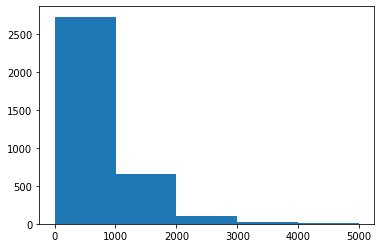

In [156]:
plt.hist(data[data['stars']== 4]['text'].apply(len),bins =5)

In [157]:
features=preprocessing(data.text)

In [ ]:
features

In [162]:
from sklearn.feature_extraction.text import CountVectorizer
wordVector = CountVectorizer(analyzer=preprocessing)
finalwordcv = wordVector.fit(data['text'])

In [ ]:
finalwordcv.vocabulary_

In [165]:
bow = finalwordcv.transform(data['text'])

In [172]:
#TF-idf
from sklearn.feature_extraction.text import TfidfTransformer
tfidfObject = TfidfTransformer().fit(bow)

In [173]:
#Create features
features = tfidfObject.transform(bow)

In [180]:
#create model
from sklearn.naive_bayes import MultinomialNB #Best for text features
model = MultinomialNB()
model.fit(features,data['stars'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [191]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(features,data['stars'])

C:\Users\Ranjith\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [195]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(features,data['stars'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [196]:
model.score(features,data['stars'])

0.6028

In [197]:
inputtext = input("enter the review: ")
preprocesstext = preprocessing(inputtext)
bowtext = finalwordcv.transform(preprocesstext)
featuretext = tfidfObject.transform(bow)
predict =model.predict(featuretext)

enter the review: It is awesome man


In [198]:
predict[0]

4

In [189]:
import seaborn as sns

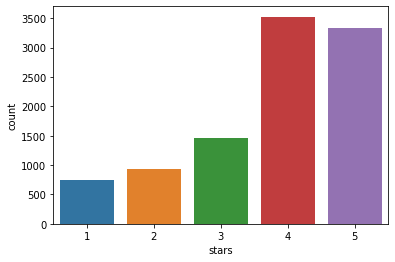

In [190]:
sns.countplot(data.stars)